In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import numpy as np

In [62]:
fifa17 = pd.read_csv("../csv_files/fifa_17.csv", index_col=0)
fifa18 = pd.read_csv("../csv_files/fifa_18.csv", index_col=0)
fifa19 = pd.read_csv("../csv_files/fifa_19.csv", index_col=0)
fifa21 = pd.read_csv("../csv_files/fifa_21.csv", index_col=0)
fifa22 = pd.read_csv("../csv_files/fifa_22.csv", index_col=0)


In [63]:
fifa17 = fifa17.sort_values(by=['points'], ascending = False)
fifa17

,player_id,fifa_version,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,...,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,points
0,20801,17,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,LW,94,87000000.0,575000.0,31,185,...,91.0,33.0,80.0,7,11,15,14,11,NaN,946
1,158023,17,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,89000000.0,575000.0,29,170,...,96.0,26.0,61.0,6,11,15,14,8,NaN,670
2,190871,17,Neymar,Neymar da Silva Santos Júnior,LW,92,109000000.0,450000.0,24,174,...,95.0,30.0,56.0,9,9,15,15,11,NaN,361
6,1179,17,G. Buffon,Gianluigi Buffon,GK,88,9000000.0,120000.0,38,192,...,NaN,NaN,NaN,87,88,68,90,84,46.0,221
5,177003,17,L. Modrić,Luka Modrić,CM,89,54000000.0,325000.0,30,174,...,89.0,72.0,66.0,13,9,7,14,9,NaN,84
4,155862,17,Sergio Ramos,Sergio Ramos García,CB,89,43500000.0,300000.0,30,183,...,71.0,87.0,83.0,11,8,9,7,11,NaN,71
9,231747,17,K. Mbappe Lottin,Kylian Mbappé Lottin,LW,71,3100000.0,20000.0,17,178,...,74.0,39.0,62.0,13,5,7,11,6,NaN,48
8,215914,17,N. Kanté,N'Golo Kanté,CM,81,21000000.0,130000.0,25,169,...,77.0,81.0,83.0,15,12,10,7,10,NaN,47
3,188545,17,R. Lewandowski,Robert Lewandowski,ST,90,71000000.0,250000.0,27,185,...,85.0,38.0,82.0,15,6,12,8,10,NaN,45
7,202126,17,H. Kane,Harry Kane,ST,84,41000000.0,140000.0,22,188,...,78.0,42.0,81.0,8,10,11,14,11,NaN,36


In [19]:
fig = px.line(x=fifa17['short_name'], y=fifa17['overall'])
fig.add_bar(x=fifa17['short_name'], y=fifa17['points'])
fig.show()


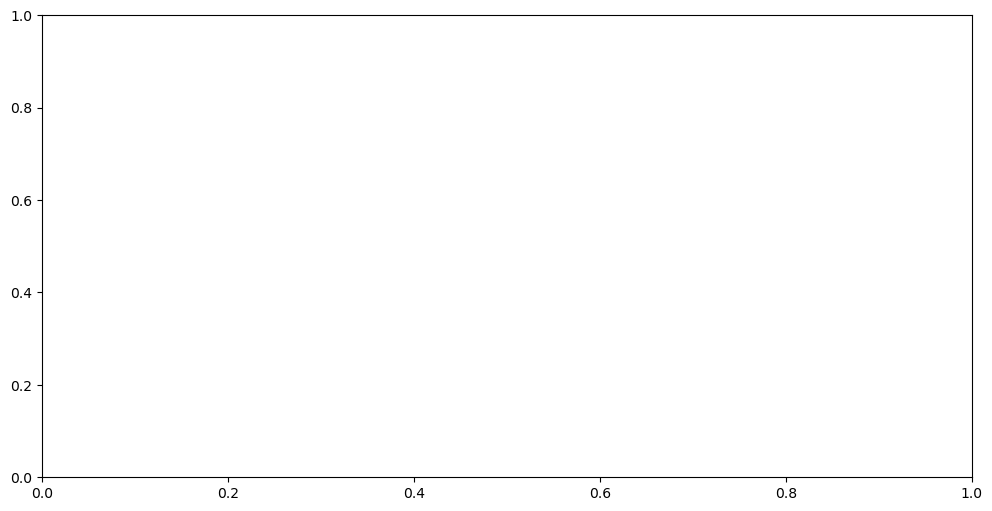

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

<AxesSubplot: xlabel='short_name', ylabel='points'>

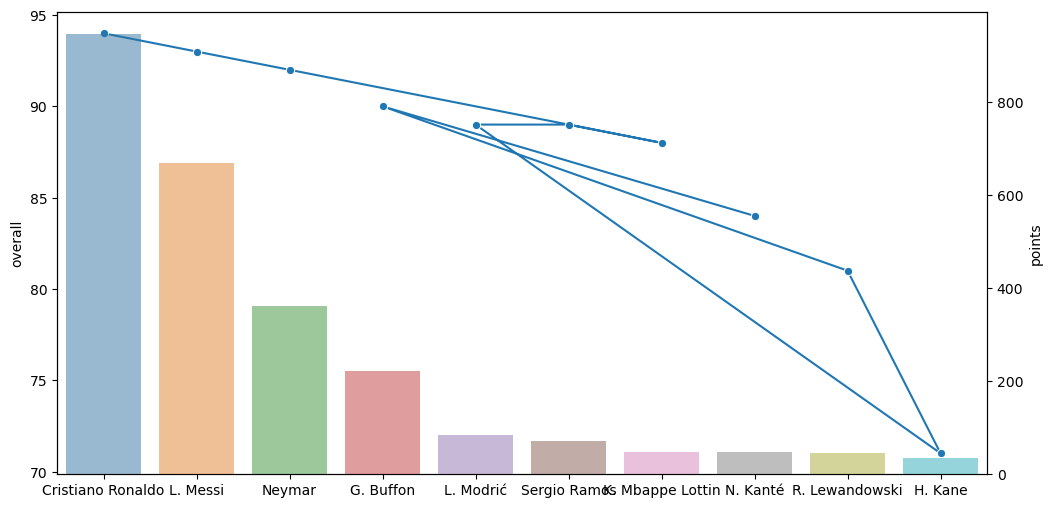

In [59]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = fifa17['overall'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = fifa17, x=fifa17['short_name'], y=fifa17['points'], alpha=0.5, ax=ax2)

In [24]:
x = fifa17.corr()['points']


/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_1665/4174595150.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [50]:
X = fifa17[['overall', 'height_cm']]
Y = fifa17['points']

In [51]:
X = sm.add_constant(X)

In [52]:
res = sm.OLS(Y, X).fit()

In [53]:
res.summary()

/Users/gerardrius/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.016
Date:                Sun, 05 Feb 2023   Prob (F-statistic):              0.204
Time:                        13:58:44   Log-Likelihood:                -68.971
No. Observations:                  10   AIC:                             143.9
Df Residuals:                       7   BIC:                             144.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1367.4907   2401.111     -0.570      0.587   -7045.215    4310.234
overall       27.6968     13.864      1.998      0.086      -5.085      60.479
height_cm     -4.4049     12.094     -0.364      0.726     -33.003      24.193
==============================================================================
Omnibus:                        2.754   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.302
Skew:                           0.878   Prob(JB):                        0.521
Kurtosis:                       2.801   Cond. No.                     5.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
fifa17

,player_id,fifa_version,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,...,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,points
0,20801,17,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,LW,94,87000000.0,575000.0,31,185,...,91.0,33.0,80.0,7,11,15,14,11,NaN,946
1,158023,17,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,89000000.0,575000.0,29,170,...,96.0,26.0,61.0,6,11,15,14,8,NaN,670
2,190871,17,Neymar,Neymar da Silva Santos Júnior,LW,92,109000000.0,450000.0,24,174,...,95.0,30.0,56.0,9,9,15,15,11,NaN,361
6,1179,17,G. Buffon,Gianluigi Buffon,GK,88,9000000.0,120000.0,38,192,...,NaN,NaN,NaN,87,88,68,90,84,46.0,221
5,177003,17,L. Modrić,Luka Modrić,CM,89,54000000.0,325000.0,30,174,...,89.0,72.0,66.0,13,9,7,14,9,NaN,84
4,155862,17,Sergio Ramos,Sergio Ramos García,CB,89,43500000.0,300000.0,30,183,...,71.0,87.0,83.0,11,8,9,7,11,NaN,71
9,231747,17,K. Mbappe Lottin,Kylian Mbappé Lottin,LW,71,3100000.0,20000.0,17,178,...,74.0,39.0,62.0,13,5,7,11,6,NaN,48
8,215914,17,N. Kanté,N'Golo Kanté,CM,81,21000000.0,130000.0,25,169,...,77.0,81.0,83.0,15,12,10,7,10,NaN,47
3,188545,17,R. Lewandowski,Robert Lewandowski,ST,90,71000000.0,250000.0,27,185,...,85.0,38.0,82.0,15,6,12,8,10,NaN,45
7,202126,17,H. Kane,Harry Kane,ST,84,41000000.0,140000.0,22,188,...,78.0,42.0,81.0,8,10,11,14,11,NaN,36


In [61]:
fifa17['player_positions'].value_counts()

LW    3
CM    2
ST    2
RW    1
GK    1
CB    1
Name: player_positions, dtype: int64

In [66]:
last_5_years = pd.concat([fifa17, fifa18, fifa19, fifa21, fifa22], ignore_index=True, sort=False)
last_5_years

,player_id,fifa_version,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,...,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,points
0,20801,17,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,LW,94,87000000.0,575000.0,31,185,...,91.0,33.0,80.0,7,11,15,14,11,NaN,946
1,158023,17,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,89000000.0,575000.0,29,170,...,96.0,26.0,61.0,6,11,15,14,8,NaN,670
2,190871,17,Neymar,Neymar da Silva Santos Júnior,LW,92,109000000.0,450000.0,24,174,...,95.0,30.0,56.0,9,9,15,15,11,NaN,361
3,1179,17,G. Buffon,Gianluigi Buffon,GK,88,9000000.0,120000.0,38,192,...,NaN,NaN,NaN,87,88,68,90,84,46.0,221
4,177003,17,L. Modrić,Luka Modrić,CM,89,54000000.0,325000.0,30,174,...,89.0,72.0,66.0,13,9,7,14,9,NaN,84
5,155862,17,Sergio Ramos,Sergio Ramos García,CB,89,43500000.0,300000.0,30,183,...,71.0,87.0,83.0,11,8,9,7,11,NaN,71
6,231747,17,K. Mbappe Lottin,Kylian Mbappé Lottin,LW,71,3100000.0,20000.0,17,178,...,74.0,39.0,62.0,13,5,7,11,6,NaN,48
7,215914,17,N. Kanté,N'Golo Kanté,CM,81,21000000.0,130000.0,25,169,...,77.0,81.0,83.0,15,12,10,7,10,NaN,47
8,188545,17,R. Lewandowski,Robert Lewandowski,ST,90,71000000.0,250000.0,27,185,...,85.0,38.0,82.0,15,6,12,8,10,NaN,45
9,202126,17,H. Kane,Harry Kane,ST,84,41000000.0,140000.0,22,188,...,78.0,42.0,81.0,8,10,11,14,11,NaN,36


In [69]:
player_positions = last_5_years['player_positions'].value_counts()

In [70]:
fig = px.histogram(last_5_years, x=last_5_years['player_positions'])
fig.show()

In [73]:
fig = px.histogram(last_5_years, x=last_5_years['long_name'])
fig.show()
